<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 23 декабря 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 23 декабря, -4 балла после 06:00 30 декабря, -6 баллов после 06:00 6 января

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12, 7)

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [75]:
# Your Code Here
df_data = pd.read_csv('titanium.csv')
df_data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [76]:
for c in df_data.columns:
    df_data[c] = (df_data[c] - df_data[c].mean()) / df_data[c].std()
    
df_data.head()

,x,y
0,-1.679650,-0.428220
1,-1.609665,-0.486883
2,-1.539679,-0.444219
3,-1.469694,-0.414887
4,-1.399708,-0.406888


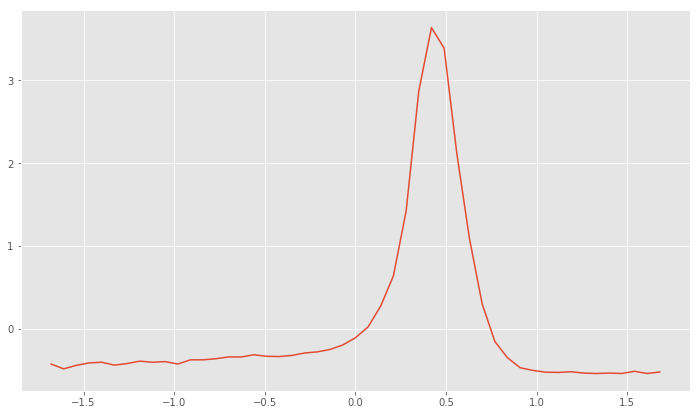

In [77]:
X = df_data.x
y = df_data.y

plt.plot(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [78]:
from sklearn.metrics import mean_absolute_error

In [79]:
## Your Code Here
lin_err = []
poly_err = []
rbf_err = []

def predicted_vec(model, X, y):
    x_vals = X.values.reshape(-1, 1)
    
    model.fit(x_vals, y.values)
    
    return model.predict(x_vals)

C = np.logspace(-2, 2, 10)

eps = 0.01

for c in C:
    # Линейное ядро
    model = SVR(C=c, kernel='linear', epsilon=eps)
    
    err = mean_absolute_error(y, predicted_vec(model, X, y))
    
    lin_err.append(err)
    
    # Полиномиальное ядро
    model = SVR(C=c, kernel='poly', degree=3, gamma=6, coef0=1, epsilon=eps)
    
    poly_err.append(mean_absolute_error(y, predicted_vec(model, X, y)))
    
    # RBF ядро
    model = SVR(C=c, kernel='rbf', gamma=6, coef0=1, epsilon=eps)
    
    rbf_err.append(mean_absolute_error(y, predicted_vec(model, X, y)))

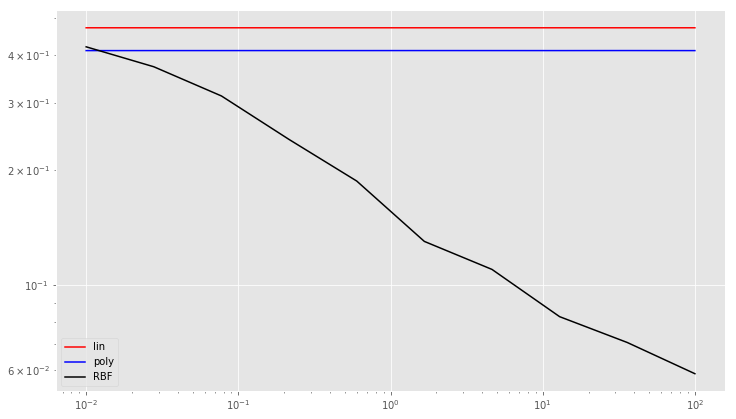

In [80]:
plt.loglog(C, lin_err, c='red')
plt.loglog(C, poly_err, c='blue')
plt.loglog(C, rbf_err, c='black')

plt.legend(['lin','poly','RBF'])

In [81]:
x_vals = X.values.reshape(-1, 1)
y_vals = y.values

best_lin_err, ind_lin = min((val, ind) for (ind, val) in enumerate(lin_err))
best_poly_err, ind_poly = min((val, ind) for (ind, val) in enumerate(poly_err))
best_rbf_err, ind_rbf = min((val, ind) for (ind, val) in enumerate(rbf_err))

best_C_lin = C[ind_lin]
model = SVR(C=best_C_lin, kernel='linear', epsilon=eps)
model.fit(x_vals, y_vals)
y_lin_predicted = model.predict(x_vals)

best_C_poly = C[ind_poly]
model = SVR(C=best_C_poly, kernel='poly', gamma=6, coef0=1, degree=3, epsilon=eps)
model.fit(x_vals, y_vals)
y_poly_predicted = model.predict(x_vals)

best_C_rbf = C[ind_rbf]
model = SVR(C=best_C_rbf, kernel='rbf', gamma=6, coef0=1, epsilon=eps)
model.fit(x_vals, y_vals)
y_rbf_predicted = model.predict(x_vals)

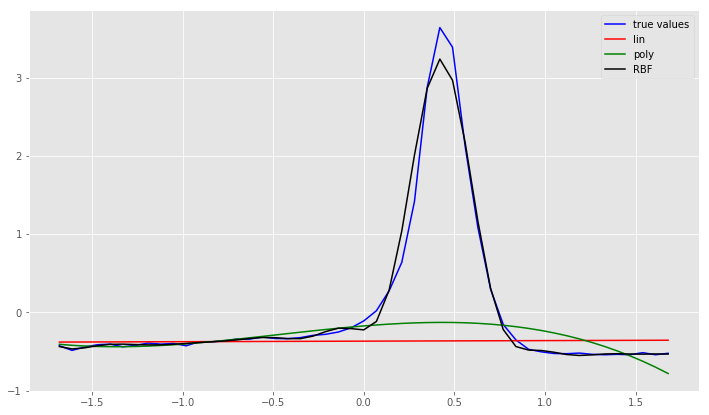

In [82]:
plt.plot(X, y, c='blue')
plt.plot(X, y_lin_predicted, c='red')
plt.plot(X, y_poly_predicted, c='green')
plt.plot(X, y_rbf_predicted, c='black')

plt.legend(['true values', 'lin','poly','RBF'])

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [83]:
## Your Code Here
es_data = pd.read_csv('war_and_peace_es.txt', sep=' ', header=-1, names=['word', 'label'])
es_data.label = 0

en_data = pd.read_csv('war_and_peace_en.txt', sep=' ', header=-1, names=['word', 'label'])
en_data.label = 1

df = es_data
df = df.append(en_data, ignore_index=True)
df.tail()

,word,label
11398,leave,1
11399,her,1
11400,task,1
11401,was,1
11402,accomplished,1


In [84]:
# like this

df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [85]:
from sklearn.cross_validation import train_test_split

In [86]:
RND_SEED = 123

df_random = df.sample(random_state=RND_SEED, n=2000)
df_random = df_random.reset_index(drop=True)
df_random.tail()

,word,label
1995,volevamo,0
1996,alz,0
1997,ininterrotto,0
1998,scopo,0
1999,was,1


In [87]:
train, test = train_test_split(df_random, test_size=0.4, random_state=RND_SEED)

In [88]:
print train.shape
print test.shape

(1200, 2)
(800, 2)


In [89]:
X_train = train.word
y_train = train.label

X_test = test.word
y_test = test.label

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [90]:
import pylev

def K_RBF (U_i, V_i):
    lev_dist = pylev.levenschtein(U_i, V_i)
    
    return np.exp(-0.5 * lev_dist ** 2)

def string_kernel(U, V):
    #Your Code Here
    kernel_matrix = np.zeros((U.shape[0], V.shape[0]))
    
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            kernel_matrix[i, j] = K_RBF(u, v)
            
    return kernel_matrix

G = string_kernel(X_train, X_train)

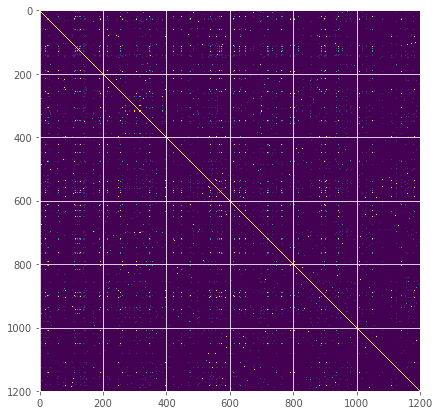

In [91]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
# Your Code Here
model= SVC(C=1, kernel='precomputed', random_state=RND_SEED)
model.fit(G, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

In [94]:
y_pred = model.predict(string_kernel(X_test, X_train))
accuracy_score (y_test, y_pred)

0.82874999999999999